# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
from sklearn.model_selection import KFold
from scipy import stats
from mlxtend.evaluate import paired_ttest_kfold_cv
from sklearn import model_selection
from yellowbrick.classifier.rocauc import roc_auc
import time
import warnings

# Load Data

In [2]:
diabetes=pd.read_csv('Diabetes_copy.csv')

diabetes = pd.DataFrame(diabetes)

print(diabetes.shape)

(69972, 22)


# Data Cleaning and Preprocessing

In [3]:
diabetes = diabetes.loc[~diabetes.gender.isin(['Unknown/Invalid'])]
diabetes.shape

(69969, 22)

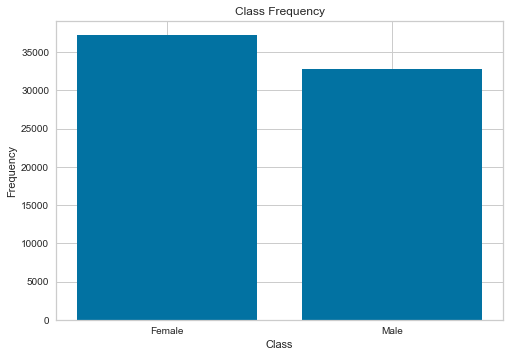

In [4]:
#Class Frequency
classes = diabetes.gender.values
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [5]:
label_encoder = LabelEncoder()
diabetes['gender']= label_encoder.fit_transform(diabetes['gender']) 

# Splitting

In [6]:
#Split dataset in features and target variable
feature_cols = ['race','age','admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital','medical_specialty','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient', 'diag_1','number_diagnoses','max_glu_serum','insulin','A1Cresult','change','diabetesMed','readmitted']
X = diabetes[feature_cols] # Features
y = diabetes.gender # Target variable
X=pd.get_dummies(X,drop_first=True)
X.shape

(69969, 53)

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) 

In [8]:
#Initializing Arrays
classifier_accuracy = []
classifier_precision = []
classifier_recall = []
classifier_f1score = []

# Decision Tree

Test Set Accuracy : 56.02877423657758 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.58      0.59      0.58     10955
           1       0.54      0.53      0.54     10036

    accuracy                           0.56     20991
   macro avg       0.56      0.56      0.56     20991
weighted avg       0.56      0.56      0.56     20991

Runtime:  0.39896106719970703 seconds

Confusion Matrix:



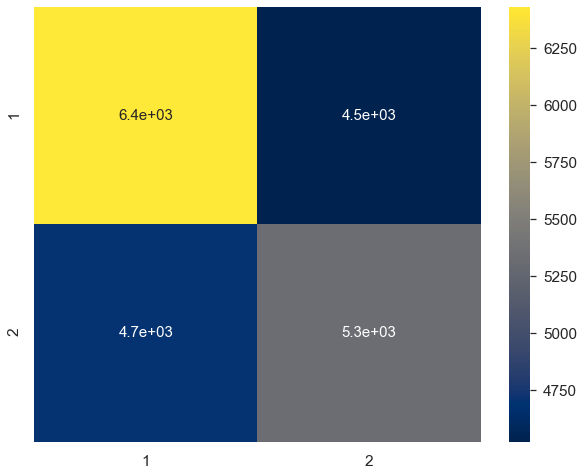

In [9]:
start = time.time()

# Creating the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=5)
   
# Fitting the dt_classifier with training data 
dt_classifier.fit(X_train, y_train) 
   
# Making a prediction on the test set 
dt_prediction = dt_classifier.predict(X_test) 
   
# Evaluating the dt_classifier 
print(f"Test Set Accuracy : {accuracy_score( dt_prediction, y_test) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report( dt_prediction, y_test)}")

classifier_accuracy.append(accuracy_score(dt_prediction, y_test))   
classifier_precision.append(precision_score(dt_prediction, y_test, average='weighted'))
classifier_recall.append(recall_score(dt_prediction, y_test, average='weighted'))
classifier_f1score.append(f1_score(dt_prediction, y_test, average='weighted'))

cm = confusion_matrix(dt_prediction, y_test) 
cm_df = pd.DataFrame(cm, range(1,3),range(1,3))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})

end = time.time()
print("Runtime: ",end - start, "seconds")
print("\nConfusion Matrix:\n")

Test Set Accuracy : 56.10499737982945 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.69      0.57      0.63     13539
           1       0.41      0.54      0.47      7452

    accuracy                           0.56     20991
   macro avg       0.55      0.56      0.55     20991
weighted avg       0.59      0.56      0.57     20991

Runtime:  0.2960021495819092 seconds

Confusion Matrix:



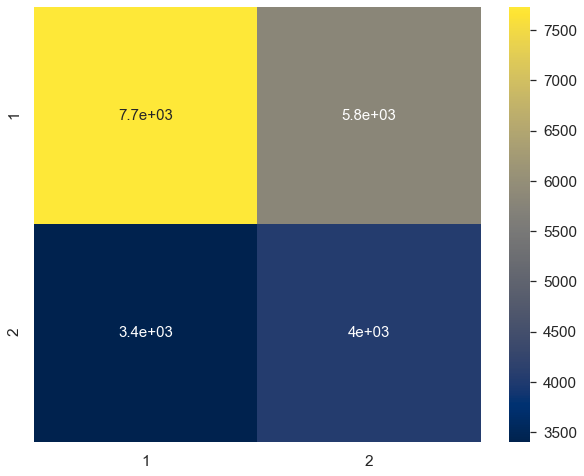

In [10]:
start = time.time()

# Creating the Bernoulli Classifier
bnb_classifier = BernoulliNB()
   
# Fitting the bnb_classifier with training data 
bnb_classifier.fit(X_train, y_train) 
   
# Making a prediction on the test set 
bnb_prediction = bnb_classifier.predict(X_test) 
   
# Evaluating the bnb_classifier 
print(f"Test Set Accuracy : {accuracy_score( bnb_prediction, y_test) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report( bnb_prediction, y_test)}")

classifier_accuracy.append(accuracy_score(bnb_prediction, y_test))   
classifier_precision.append(precision_score(bnb_prediction, y_test, average='weighted'))
classifier_recall.append(recall_score(bnb_prediction, y_test, average='weighted'))
classifier_f1score.append(f1_score(bnb_prediction, y_test, average='weighted'))

cm = confusion_matrix(bnb_prediction, y_test) 
cm_df = pd.DataFrame(cm, range(1,3),range(1,3))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})

end = time.time()
print("Runtime: ",end - start, "seconds")
print("\nConfusion Matrix:\n")

Test Set Accuracy : 53.218045829164886 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.58      0.56      0.57     11693
           1       0.47      0.50      0.49      9298

    accuracy                           0.53     20991
   macro avg       0.53      0.53      0.53     20991
weighted avg       0.54      0.53      0.53     20991

Runtime:  7.302983999252319 seconds

Confusion Matrix:



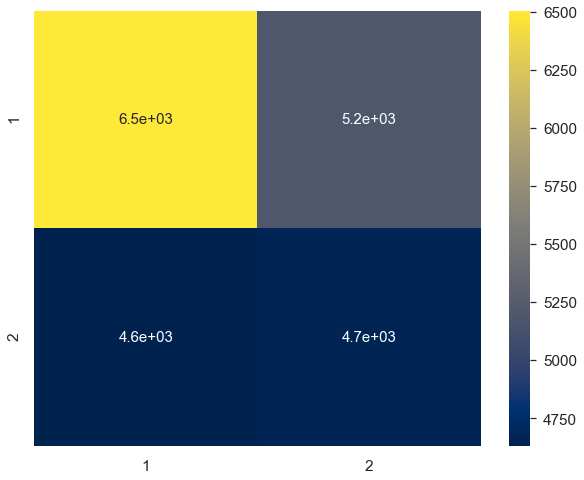

In [11]:
start = time.time()

# Creating the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)
   
# Fitting the knn_classifier with training data 
knn_classifier.fit(X_train, y_train) 
   
# Making a prediction on the test set 
knn_prediction = knn_classifier.predict(X_test) 
   
# Evaluating the knn_classifier 
print(f"Test Set Accuracy : {accuracy_score( knn_prediction, y_test) * 100} %\n\n") 
print(f"Classification Report : \n\n{classification_report( knn_prediction, y_test)}")

classifier_accuracy.append(accuracy_score(knn_prediction, y_test))   
classifier_precision.append(precision_score(knn_prediction, y_test, average='weighted'))
classifier_recall.append(recall_score(knn_prediction, y_test, average='weighted'))
classifier_f1score.append(f1_score(knn_prediction, y_test, average='weighted'))

cm = confusion_matrix(knn_prediction, y_test) 
cm_df = pd.DataFrame(cm, range(1,3),range(1,3))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})

end = time.time()
print("Runtime: ",end - start, "seconds")
print("\nConfusion Matrix:\n")

Test Set Accuracy : 56.66714306131199 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.83      0.56      0.67     16441
           1       0.27      0.58      0.37      4550

    accuracy                           0.57     20991
   macro avg       0.55      0.57      0.52     20991
weighted avg       0.71      0.57      0.60     20991

Runtime:  327.15415811538696 seconds

Confusion Matrix:



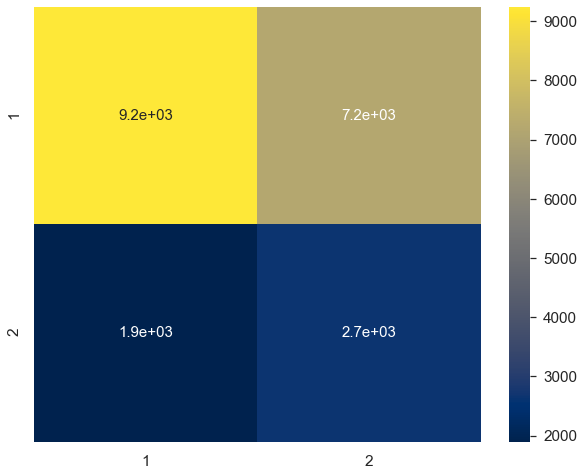

In [12]:
start = time.time()

# Creating the SVM svc_classifier 
svm_classifier = SVC(kernel="linear") 
   
# Fitting the svc_classifier with training data 
svm_classifier.fit(X_train, y_train) 
   
# Making a prediction on the test set 
svm_prediction = svm_classifier.predict(X_test) 
   
# Evaluating the svc_classifier 
print(f"Test Set Accuracy : {accuracy_score( svm_prediction, y_test) * 100} %\n\n") 
print(f"Classification Report : \n\n{classification_report( svm_prediction, y_test)}") 

classifier_accuracy.append(accuracy_score(svm_prediction, y_test))   
classifier_precision.append(precision_score(svm_prediction, y_test, average='weighted'))
classifier_recall.append(recall_score(svm_prediction, y_test, average='weighted'))
classifier_f1score.append(f1_score(svm_prediction, y_test, average='weighted'))

cm = confusion_matrix(svm_prediction, y_test) 
cm_df = pd.DataFrame(cm, range(1,3),range(1,3))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})

end = time.time()
print("Runtime: ",end - start, "seconds")
print("\nConfusion Matrix:\n")

Test Set Accuracy : 56.17645657662808 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.63      0.58      0.60     12100
           1       0.48      0.54      0.51      8891

    accuracy                           0.56     20991
   macro avg       0.56      0.56      0.56     20991
weighted avg       0.57      0.56      0.56     20991

Runtime:  2.9487380981445312 seconds

Confusion Matrix:



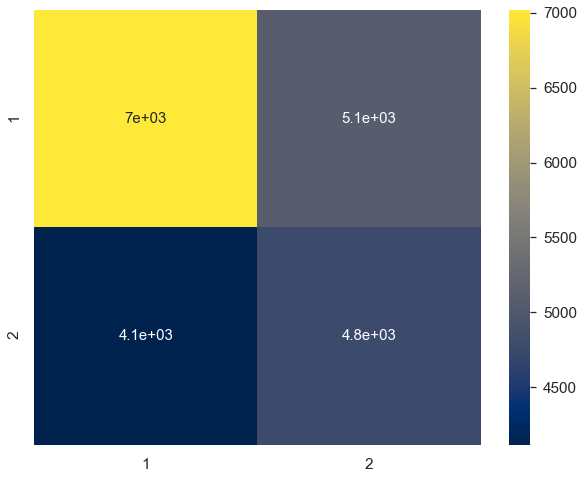

In [13]:
start = time.time()

# Creating the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=25) 
   
# Fitting the rf_classifier with training data 
rf_classifier.fit(X_train, y_train) 
   
# Making a prediction on the test set 
rf_prediction = rf_classifier.predict(X_test) 
   
# Evaluating the rf_classifier 
print(f"Test Set Accuracy : {accuracy_score( rf_prediction, y_test) * 100} %\n\n") 
print(f"Classification Report : \n\n{classification_report( rf_prediction, y_test)}")

classifier_accuracy.append(accuracy_score(rf_prediction, y_test))   
classifier_precision.append(precision_score(rf_prediction, y_test, average='weighted'))
classifier_recall.append(recall_score(rf_prediction, y_test, average='weighted'))
classifier_f1score.append(f1_score(rf_prediction, y_test, average='weighted'))

cm = confusion_matrix(rf_prediction, y_test) 
cm_df = pd.DataFrame(cm, range(1,3),range(1,3))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})

end = time.time()
print("Runtime: ",end - start, "seconds")
print("\nConfusion Matrix:\n")

Test Set Accuracy : 55.671478252584436 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.63      0.57      0.60     12262
           1       0.47      0.53      0.50      8729

    accuracy                           0.56     20991
   macro avg       0.55      0.55      0.55     20991
weighted avg       0.57      0.56      0.56     20991

Runtime:  13.018017053604126 seconds

Confusion Matrix:



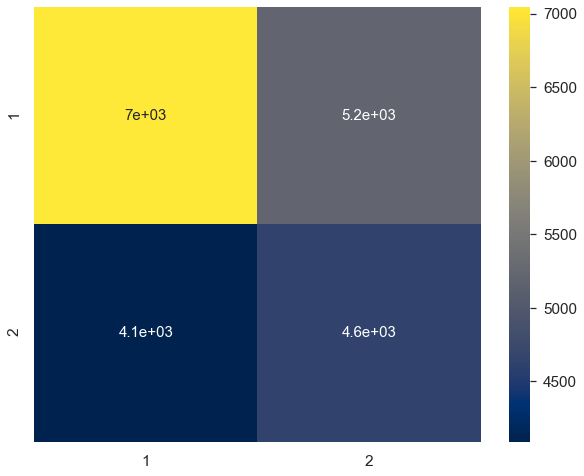

In [14]:
start = time.time()

# Creating the Extra Tree Classifier
et_classifier = ExtraTreesClassifier()
   
# Fitting the et_classifier with training data 
et_classifier.fit(X_train, y_train) 
   
# Making a prediction on the test set 
et_prediction = et_classifier.predict(X_test) 
   
# Evaluating the et_classifier 
print(f"Test Set Accuracy : {accuracy_score(et_prediction, y_test) * 100} %\n\n") 
print(f"Classification Report : \n\n{classification_report( et_prediction, y_test)}")

classifier_accuracy.append(accuracy_score(et_prediction, y_test))   
classifier_precision.append(precision_score(et_prediction, y_test, average='weighted'))
classifier_recall.append(recall_score(et_prediction, y_test, average='weighted'))
classifier_f1score.append(f1_score(et_prediction, y_test, average='weighted'))

cm = confusion_matrix(et_prediction, y_test) 
cm_df = pd.DataFrame(cm, range(1,3),range(1,3))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})

end = time.time()
print("Runtime: ",end - start, "seconds")
print("\nConfusion Matrix:\n")

Test Set Accuracy : 55.957315039778955 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.65      0.58      0.61     12544
           1       0.46      0.54      0.49      8447

    accuracy                           0.56     20991
   macro avg       0.55      0.56      0.55     20991
weighted avg       0.57      0.56      0.56     20991

Runtime:  20.88557481765747 seconds

Confusion Matrix:



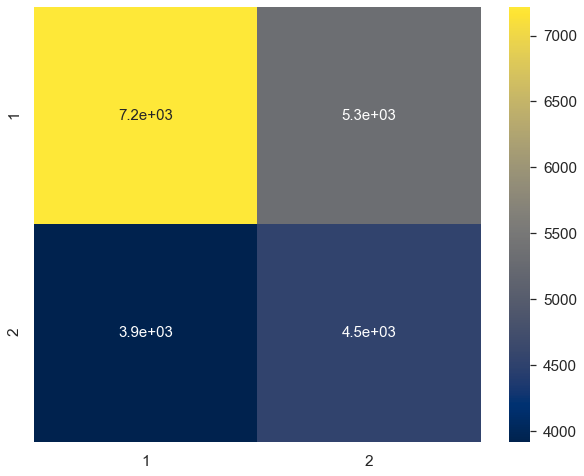

In [15]:
start = time.time()

# Creating the Bagging Classifier
bg_classifier = BaggingClassifier(DecisionTreeClassifier(),n_estimators = 50)
   
# Fitting the bg_classifier with training data 
bg_classifier.fit(X_train, y_train) 
   
# Making a prediction on the test set 
bg_prediction = bg_classifier.predict(X_test) 
   
# Evaluating the bg_classifier 
print(f"Test Set Accuracy : {accuracy_score( bg_prediction, y_test) * 100} %\n\n") 
print(f"Classification Report : \n\n{classification_report( bg_prediction, y_test)}")

classifier_accuracy.append(accuracy_score(bg_prediction, y_test))   
classifier_precision.append(precision_score(bg_prediction, y_test, average='weighted'))
classifier_recall.append(recall_score(bg_prediction, y_test, average='weighted'))
classifier_f1score.append(f1_score(bg_prediction, y_test, average='weighted'))

cm = confusion_matrix(bg_prediction, y_test) 
cm_df = pd.DataFrame(cm, range(1,3),range(1,3))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_df,cmap='cividis',annot=True,annot_kws={"size": 15})

end = time.time()
print("Runtime: ",end - start, "seconds")
print("\nConfusion Matrix:\n")

In [16]:
#Accuracy Table
M = ["DecisionTreeClassifier" , "BernoulliNB" ,"KNNClassifier", "LinearSVC", "RandomForestClassifier" , "ExtraTreeClassifier", "BaggingClassifier"]
Table = { "Algorithm" : M, "Accuracy" : classifier_accuracy, "Precision" : classifier_precision, "Recall" : classifier_recall, "F1 score" : classifier_f1score}
Acc_table = pd.DataFrame(Table)
Acc_table

,Algorithm,Accuracy,Precision,Recall,F1 score
0,DecisionTreeClassifier,0.560288,0.559974,0.560288,0.560090
1,BernoulliNB,0.561050,0.593529,0.561050,0.570150
2,KNNClassifier,0.532180,0.535120,0.532180,0.533277
3,LinearSVC,0.566671,0.708336,0.566671,0.604784
4,RandomForestClassifier,0.561765,0.568471,0.561765,0.563943
5,ExtraTreeClassifier,0.556715,0.565413,0.556715,0.559479
6,BaggingClassifier,0.559573,0.572234,0.559573,0.563422



 ROC Curve:


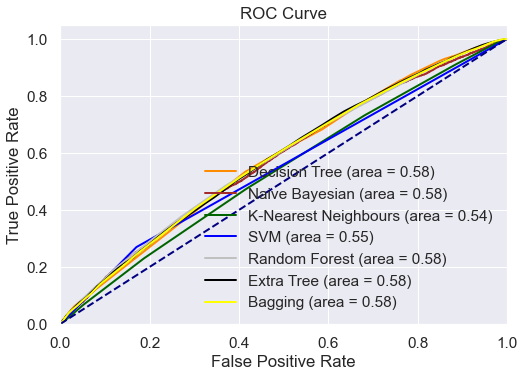

In [18]:
#ROC Curve
print('\n ROC Curve:')
y_pred_prob_dt = dt_classifier.predict_proba(X_test)[:,1]
dt_fpr, dt_tpr,_= roc_curve(y_test, y_pred_prob_dt)
dt_roc_auc = auc(dt_fpr, dt_tpr)

y_pred_prob_bnb = bnb_classifier.predict_proba(X_test)[:,1]
bnb_fpr, bnb_tpr,_ = roc_curve(y_test, y_pred_prob_bnb)
bnb_roc_auc = auc(bnb_fpr, bnb_tpr)

y_pred_prob_knn = knn_classifier.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr,_ = roc_curve(y_test, y_pred_prob_knn)
knn_roc_auc = auc(knn_fpr, knn_tpr)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_prediction)
svm_roc_auc = auc(svm_fpr, svm_tpr)

y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_prob_rf)
rf_roc_auc = auc(rf_fpr, rf_tpr)

y_pred_prob_et = et_classifier.predict_proba(X_test)[:,1]
et_fpr, et_tpr, _ = roc_curve(y_test, y_pred_prob_et)
et_roc_auc = auc(et_fpr, et_tpr)

y_pred_prob_bg = bg_classifier.predict_proba(X_test)[:,1]
bg_fpr, bg_tpr, _ = roc_curve(y_test, y_pred_prob_bg)
bg_roc_auc = auc(bg_fpr, bg_tpr)


plt.figure()
plt.plot(dt_fpr, dt_tpr, color='darkorange',lw=2, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

plt.plot(bnb_fpr, bnb_tpr, color='brown',lw=2, label='Naive Bayesian (area = %0.2f)' % bnb_roc_auc)

plt.plot(knn_fpr, knn_tpr, color='darkgreen',lw=2, label='K-Nearest Neighbours (area = %0.2f)' % knn_roc_auc)

plt.plot(svm_fpr, svm_tpr, color='blue',lw=2, label='SVM (area = %0.2f)' % svm_roc_auc)

plt.plot(rf_fpr, rf_tpr, color='silver',lw=2, label='Random Forest (area = %0.2f)' % rf_roc_auc)

plt.plot(et_fpr, et_tpr, color='black',lw=2, label='Extra Tree (area = %0.2f)' % et_roc_auc)

plt.plot(bg_fpr, bg_tpr, color='yellow',lw=2, label='Bagging (area = %0.2f)' % bg_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
#Ten Fold Cross Validation - Bernoulli Classifier 
gnb_tfcv = model_selection.KFold(n_splits=10, random_state=None)
model_gnb_tfcv = BernoulliNB()
result_gnb_tfcv = model_selection.cross_val_score(model_gnb_tfcv, X, y, cv=gnb_tfcv)
print(result_gnb_tfcv)
print("\nAccuracy:",  (result_gnb_tfcv.mean() *100.0)) 

[0.55338002 0.54680577 0.55823925 0.558668   0.56467057 0.57181649
 0.57524653 0.55152208 0.55595255 0.56475129]

Accuracy: 56.01052558423103


In [20]:
#Ten Fold Cross Validation - Random Forest 
rf_tfcv = model_selection.KFold(n_splits=10, random_state=None)
model_rf_tfcv = RandomForestClassifier(n_estimators=7)
result_rf_tfcv = model_selection.cross_val_score(model_rf_tfcv, X, y, cv=rf_tfcv)
print(result_rf_tfcv)
print("\nAccuracy:",  (result_rf_tfcv.mean() *100.0)) 

[0.54223239 0.52879806 0.54666286 0.54166071 0.54923539 0.5408032
 0.55037873 0.53594398 0.54980706 0.53987993]

Accuracy: 54.25402298117964


In [21]:
print("\nPaired-t-test:")
print("\nNaiveBayesian-RandomForest:", stats.ttest_rel(result_gnb_tfcv, result_rf_tfcv))


Paired-t-test:

NaiveBayesian-RandomForest: Ttest_relResult(statistic=7.422487115643609, pvalue=4.006882219865603e-05)


The Naive Bayesian and Random Forest are not Statistically Significant because the pair has p value above 0.05. 